In [1]:
# Import necessary packages
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

# Set significance level for use throughout the testing
alpha = 0.05

In [2]:
# Read dataframe
search = pd.read_csv('search.csv')

In [3]:
# Segment the dataframe by relevance score
search_1 = search[search['relevance_reduced'] == 1]
search_2 = search[search['relevance_reduced'] == 2]
search_3 = search[search['relevance_reduced'] == 3]

In [4]:
# Create list of dataframe columns that will be tested
cols = ['title_pct', 'desc_pct', 'att_pct', 'title_pct_prod', 'desc_pct_prod', 'att_pct_prod',
       'title_avg', 'desc_avg', 'att_avg', 'title_total', 'desc_total', 'att_total',
       'title_max', 'desc_max', 'att_max'] 

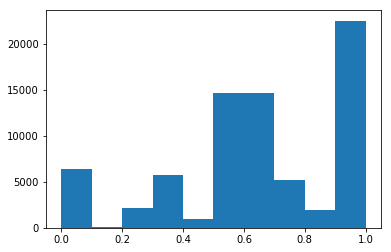

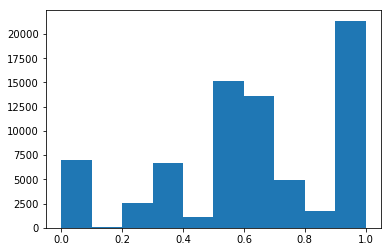

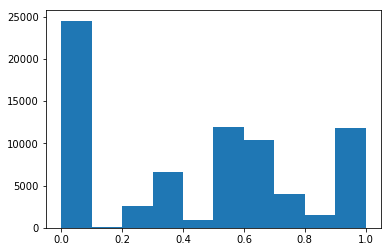

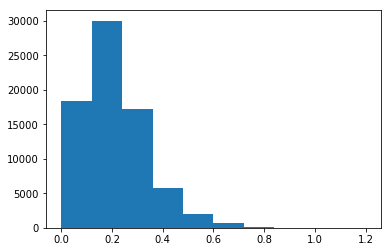

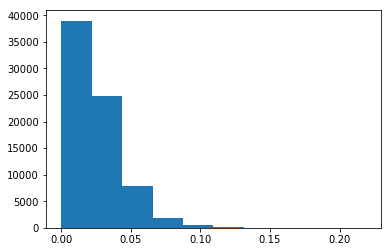

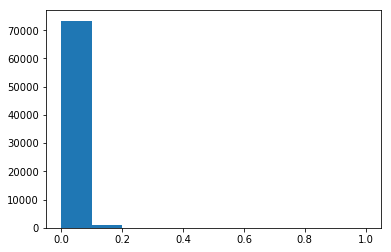

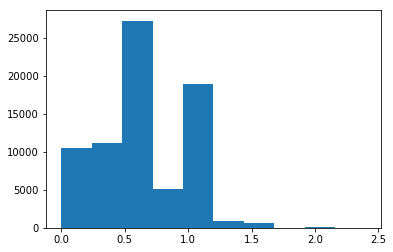

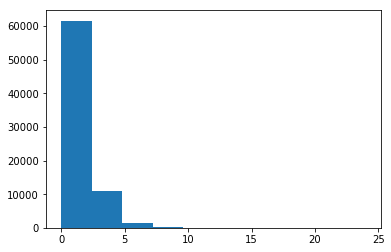

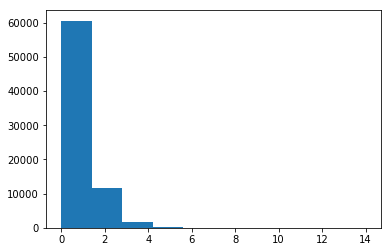

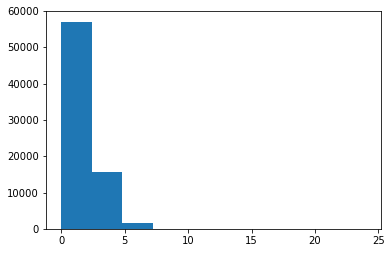

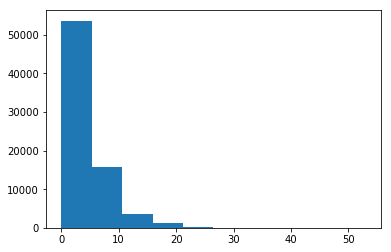

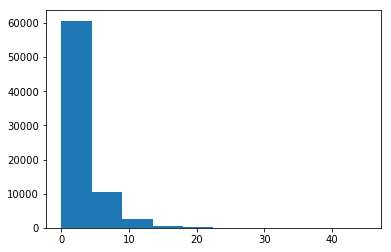

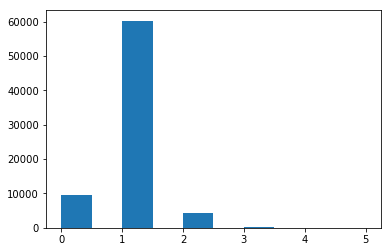

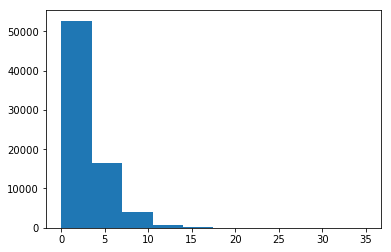

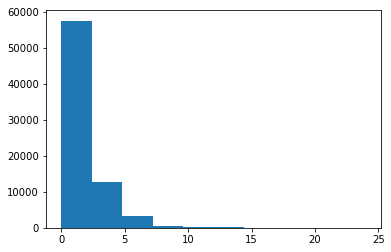

In [5]:
# Generate histograms for all columns
for col in cols:
    plt.hist(search[col])
    plt.show()

None of the distributions of the variables appear normal.  Most are right skewed or multimodal.  For this reason, we will use the nonparametric Kruskal-Wallis test for equality of distributions.

Null hypothesis: The distributions of the variables for the three relevance level are identical.<br>
Alternative hypothesis: At least one of the variable has a distribution different from the other two.

In [6]:
# Perform the Kruskal-Wallis test for all the columns in the list cols
print('p-values by column for Kruskal-Wallis test')
for col in cols:
    s, p = stats.kruskal(search_1[col], search_2[col], search_3[col])
    print (f'{col}: {p:.2e}')

p-values by column for Kruskal-Wallis test
title_pct: 0.00e+00
desc_pct: 0.00e+00
att_pct: 5.71e-93
title_pct_prod: 0.00e+00
desc_pct_prod: 3.00e-271
att_pct_prod: 1.98e-123
title_avg: 0.00e+00
desc_avg: 0.00e+00
att_avg: 1.06e-114
title_total: 0.00e+00
desc_total: 0.00e+00
att_total: 5.37e-151
title_max: 0.00e+00
desc_max: 0.00e+00
att_max: 7.00e-133


All of the p-values are less than our predetermined significance level and therefore we can reject the null hypothesis for each column and conclude that the distributions of the variables differ by relevance score.

In the cases of some variables, the boxplots examined previously were very similar, so let's examine more closely the measures of central tendency for each variable.

In [7]:
# Calculate median for each variable and relevance score combination
for col in cols:
    print(col+' Medians:')
    print(f'Relevance 1: {np.median(search_1[col]):.2f}')
    print(f'Relevance 2: {np.median(search_2[col]):.2f}')
    print(f'Relevance 3: {np.median(search_3[col]):.2f}')
    print('')

title_pct Medians:
Relevance 1: 0.50
Relevance 2: 0.67
Relevance 3: 1.00

desc_pct Medians:
Relevance 1: 0.50
Relevance 2: 0.67
Relevance 3: 0.80

att_pct Medians:
Relevance 1: 0.33
Relevance 2: 0.50
Relevance 3: 0.50

title_pct_prod Medians:
Relevance 1: 0.14
Relevance 2: 0.19
Relevance 3: 0.22

desc_pct_prod Medians:
Relevance 1: 0.02
Relevance 2: 0.02
Relevance 3: 0.02

att_pct_prod Medians:
Relevance 1: 0.02
Relevance 2: 0.02
Relevance 3: 0.01

title_avg Medians:
Relevance 1: 0.50
Relevance 2: 0.60
Relevance 3: 1.00

desc_avg Medians:
Relevance 1: 0.67
Relevance 2: 1.00
Relevance 3: 1.50

att_avg Medians:
Relevance 1: 0.33
Relevance 2: 0.60
Relevance 3: 0.50

title_total Medians:
Relevance 1: 1.00
Relevance 2: 2.00
Relevance 3: 2.00

desc_total Medians:
Relevance 1: 2.00
Relevance 2: 3.00
Relevance 3: 4.00

att_total Medians:
Relevance 1: 1.00
Relevance 2: 2.00
Relevance 3: 1.00

title_max Medians:
Relevance 1: 1.00
Relevance 2: 1.00
Relevance 3: 1.00

desc_max Medians:
Relevance 1

We can see that for some of the variables, the median is consistent across all relevance scores.  Let's now look at the means.

In [8]:
# Calculate mean for each variable and relevance score combination
for col in cols:
    print(col+' Means:')
    print(f'Relevance 1: {np.mean(search_1[col]):.2f}')
    print(f'Relevance 2: {np.mean(search_2[col]):.2f}')
    print(f'Relevance 3: {np.mean(search_3[col]):.2f}')
    print('')

title_pct Means:
Relevance 1: 0.48
Relevance 2: 0.63
Relevance 3: 0.80

desc_pct Means:
Relevance 1: 0.48
Relevance 2: 0.61
Relevance 3: 0.75

att_pct Means:
Relevance 1: 0.37
Relevance 2: 0.45
Relevance 3: 0.44

title_pct_prod Means:
Relevance 1: 0.15
Relevance 2: 0.20
Relevance 3: 0.24

desc_pct_prod Means:
Relevance 1: 0.02
Relevance 2: 0.03
Relevance 3: 0.03

att_pct_prod Means:
Relevance 1: 0.02
Relevance 2: 0.02
Relevance 3: 0.02

title_avg Means:
Relevance 1: 0.42
Relevance 2: 0.58
Relevance 3: 0.76

desc_avg Means:
Relevance 1: 0.95
Relevance 2: 1.38
Relevance 3: 1.76

att_avg Means:
Relevance 1: 0.58
Relevance 2: 0.77
Relevance 3: 0.79

title_total Means:
Relevance 1: 1.28
Relevance 2: 1.82
Relevance 3: 2.09

desc_total Means:
Relevance 1: 2.90
Relevance 2: 4.32
Relevance 3: 4.85

att_total Means:
Relevance 1: 1.85
Relevance 2: 2.57
Relevance 3: 2.35

title_max Means:
Relevance 1: 0.77
Relevance 2: 0.95
Relevance 3: 1.01

desc_max Means:
Relevance 1: 2.10
Relevance 2: 2.86
Rel

The means show more variablity across the three relevance scores, which is more consistent with the results of the Kruskal-Wallis tests.  Most variables show a positive correlation with relevance score.  The exceptions to this would be the variable related to the Attributes field.  This would be consistent with the trends seen in the boxplots.  Let's now look at correlation.

In [9]:
# Calculate correlation between each variable and relevance score
print('Correlation values:')
for col in cols:
    corr = np.corrcoef(search[col], search['relevance'])[0, 1]
    print(f'{col}: {corr:.3f}')

Correlation values:
title_pct: 0.355
desc_pct: 0.295
att_pct: 0.067
title_pct_prod: 0.228
desc_pct_prod: 0.122
att_pct_prod: -0.009
title_avg: 0.328
desc_avg: 0.213
att_avg: 0.082
title_total: 0.226
desc_total: 0.163
att_total: 0.057
title_max: 0.180
desc_max: 0.135
att_max: 0.026


The results show a positive correlation with almost every variable and relevance score.  The weakest correlations (including the one negative correlation) are found in the variable related to Attributes.  Again, this is consistent with previous results.

Let's now look at the boolean phrase values.

In [10]:
# Create list containing necessary columns
cols2 = ['title_phrase', 'desc_phrase', 'att_phrase']

In [11]:
# Print the proportion of observations where the search phrase appears in a text field for each relevance level.
for col in cols2:
    pct1 = sum(search_1[col] == 1) / len(search_1[col])
    pct2 = sum(search_2[col] == 1) / len(search_2[col])
    pct3 = sum(search_3[col] == 1) / len(search_3[col])
    
    print(col+':')
    print(f'Relevance 1: {pct1:.3f}')
    print(f'Relevance 2: {pct2:.3f}')
    print(f'Relevance 3: {pct3:.3f}')
    print('')

title_phrase:
Relevance 1: 0.052
Relevance 2: 0.088
Relevance 3: 0.219

desc_phrase:
Relevance 1: 0.049
Relevance 2: 0.068
Relevance 3: 0.166

att_phrase:
Relevance 1: 0.023
Relevance 2: 0.027
Relevance 3: 0.049



We see the proportion increase across all three variables.  Again, the weakest effect is seen within the Attributes field.  Let's now test the significance of these results with pairwise tests.

Null hypothesis: The two proportions are equal.<br>
Alternative hypothesis: The two proportions are not equal.

In [12]:
# Define function that will perform proportion test on each pair of proportions.
from statsmodels.stats.proportion import proportions_ztest

def prop_test(column):
    s12, p12 = proportions_ztest([sum(search_1[column] == 1), sum(search_2[column] == 1)]
                               , [len(search_1[column]), len(search_2[column])])
    s13, p13 = proportions_ztest([sum(search_1[column] == 1), sum(search_3[column] == 1)]
                               , [len(search_1[column]), len(search_3[column])])
    s23, p23 = proportions_ztest([sum(search_2[column] == 1), sum(search_3[column] == 1)]
                               , [len(search_2[column]), len(search_3[column])])
    return (p12, p13, p23)

In [13]:
# Perform the test for each of the three variables.
title_p1, title_p2, title_p3 = prop_test('title_phrase')
print('p-values for pairwise tests for title phrase:')
print(f'Relevance Scores 1 and 2: {title_p1:.2e}')
print(f'Relevance Scores 1 and 3: {title_p2:.2e}')
print(f'Relevance Scores 2 and 3: {title_p3:.2e}')

p-values for pairwise tests for title phrase:
Relevance Scores 1 and 2: 6.91e-38
Relevance Scores 1 and 3: 0.00e+00
Relevance Scores 2 and 3: 0.00e+00


In [14]:
desc_p1, desc_p2, desc_p3 = prop_test('desc_phrase')
print('p-values for pairwise tests for description phrase:')
print(f'Relevance Scores 1 and 2: {desc_p1:.2e}')
print(f'Relevance Scores 1 and 3: {desc_p2:.2e}')
print(f'Relevance Scores 2 and 3: {desc_p3:.2e}')

p-values for pairwise tests for description phrase:
Relevance Scores 1 and 2: 1.33e-14
Relevance Scores 1 and 3: 2.52e-208
Relevance Scores 2 and 3: 0.00e+00


In [15]:
att_p1, att_p2, att_p3 = prop_test('att_phrase')
print('p-values for pairwise tests for attribute phrase:')
print(f'Relevance Scores 1 and 2: {att_p1:.2e}')
print(f'Relevance Scores 1 and 3: {att_p2:.2e}')
print(f'Relevance Scores 2 and 3: {att_p3:.2e}')

p-values for pairwise tests for attribute phrase:
Relevance Scores 1 and 2: 2.26e-02
Relevance Scores 1 and 3: 6.29e-30
Relevance Scores 2 and 3: 2.27e-44


In all cases, the p-values are well below our predetermined level of significance and we can reject the null hypothesis that the proportions are equal.

To conclude, the above testing show that our numerical variables do have different distributions across the three relevance levels and that many of them do show evidence of a positive correlation with relevance score.  The variables that are exceptions are the ones related to the Attributes field.  